In [1]:
import pandas as pd
import warnings
import io
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('USDT-USD.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())

         Date      Open      High       Low     Close  Adj Close      Volume
0  2019-03-01  1.009786  1.016391  1.005785  1.006868   1.006868  6628411253
1  2019-03-02  1.006662  1.014362  1.005656  1.011416   1.011416  6623334103
2  2019-03-03  1.008331  1.014543  1.006855  1.010220   1.010220  6148316202
3  2019-03-04  1.008603  1.017043  1.007319  1.011617   1.011617  8129567032
4  2019-03-05  1.010793  1.013756  1.004794  1.011154   1.011154  9791470887
              Open         High          Low        Close    Adj Close  \
count  1920.000000  1920.000000  1920.000000  1920.000000  1920.000000   
mean      1.000983     1.004275     0.998315     1.000989     1.000989   
std       0.002822     0.007103     0.004800     0.002928     0.002928   
min       0.973284     0.996570     0.899490     0.974248     0.974248   
25%       1.000008     1.000491     0.998326     1.000010     1.000010   
50%       1.000299     1.001069     0.999631     1.000296     1.000296   
75%       1.001113  

In [2]:
# Check the columns to ensure 'Date' is present
print(df.columns)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the dataframe to confirm changes
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2019-03-01  1.009786  1.016391  1.005785  1.006868   1.006868  6628411253
2019-03-02  1.006662  1.014362  1.005656  1.011416   1.011416  6623334103
2019-03-03  1.008331  1.014543  1.006855  1.010220   1.010220  6148316202
2019-03-04  1.008603  1.017043  1.007319  1.011617   1.011617  8129567032
2019-03-05  1.010793  1.013756  1.004794  1.011154   1.011154  9791470887


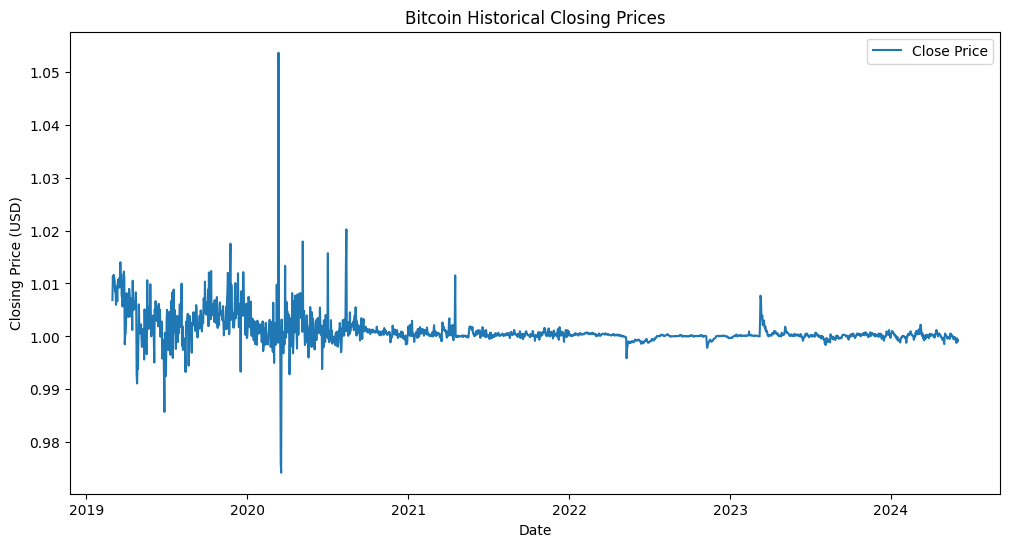

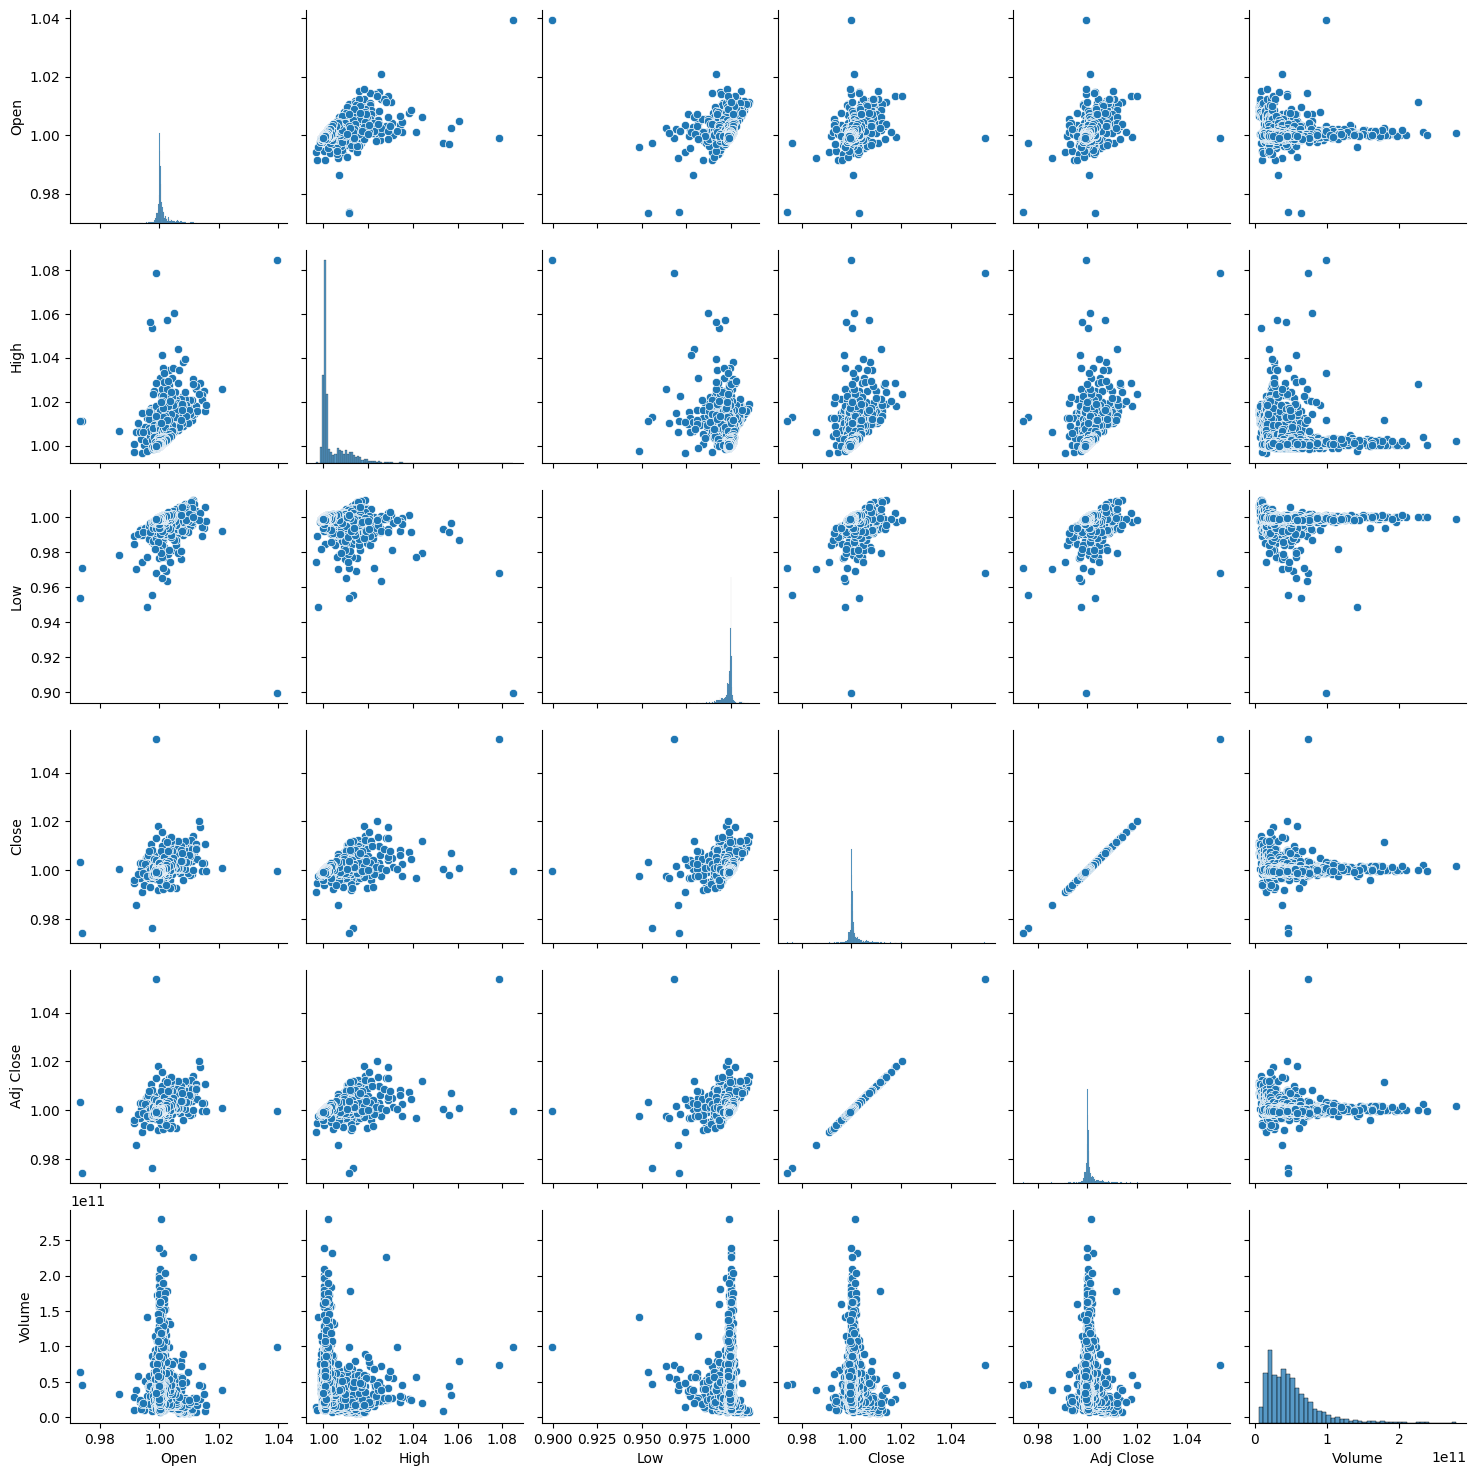

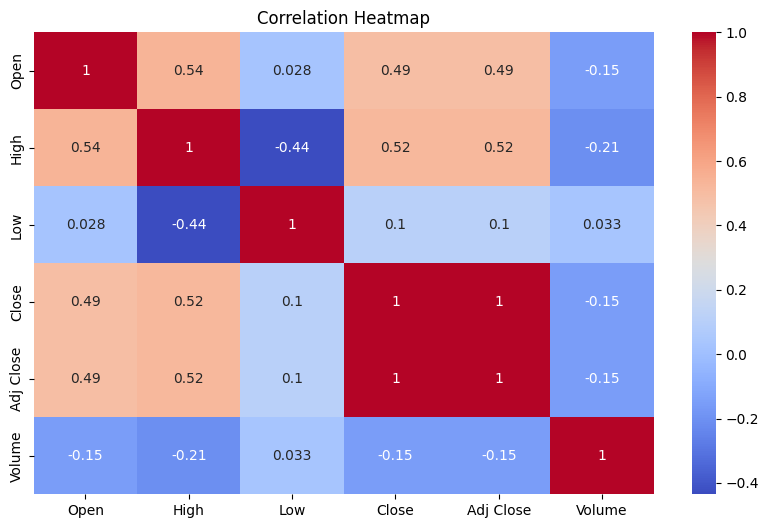

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the historical closing prices of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Pair plot to explore relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

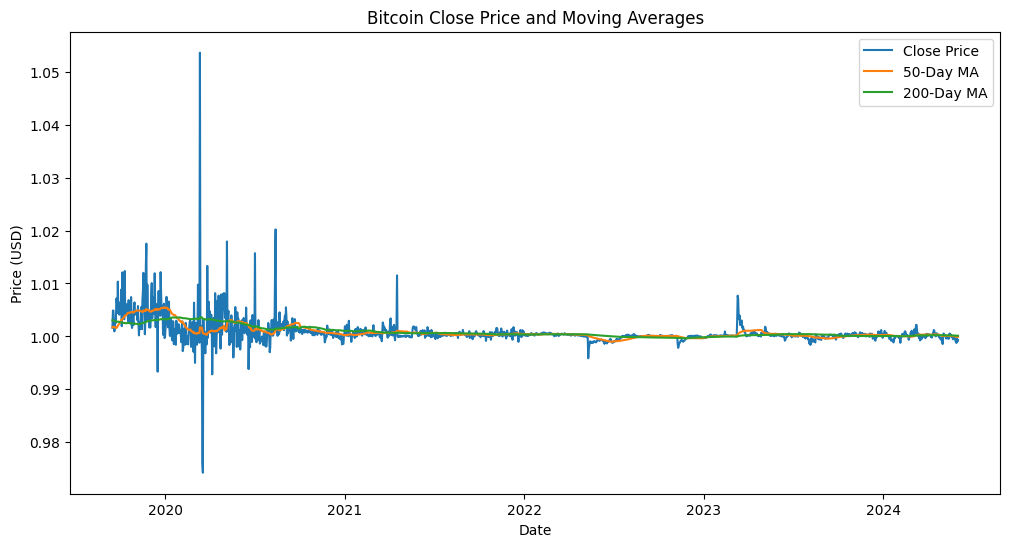

In [4]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate moving averages
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

# Drop NaN values created by rolling windows
df.dropna(inplace=True)

# Visualize the new features
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['50-Day MA'], label='50-Day MA')
plt.plot(df['200-Day MA'], label='200-Day MA')
plt.title('Bitcoin Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Mean Squared Error: 1.6992789363108054e-07
R^2 Score: 0.975239268085386


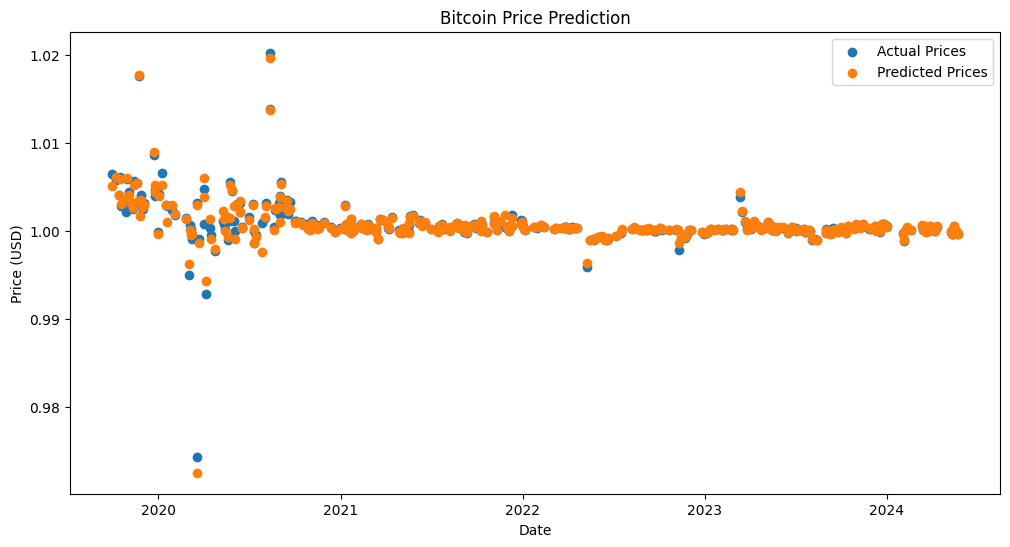

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the feature set and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

models comparisons 7-2 split


In [6]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)



In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.9973719  0.99736868 0.99736546 0.99736223 0.99735901 0.99735579
 0.99735256 0.99734934 0.99734612 0.99734289 0.99733967 0.99733644
 0.99733322 0.99733    0.99732677 0.99732355 0.99732033 0.9973171
 0.99731388 0.99731066 0.99730743 0.99730421 0.99730099 0.99729776
 0.99729454 0.99729131 0.99728809 0.99728487 0.99728164 0.99727842]


In [10]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 0.002160976244362016


Testing RMSE: 0.002160976244362016


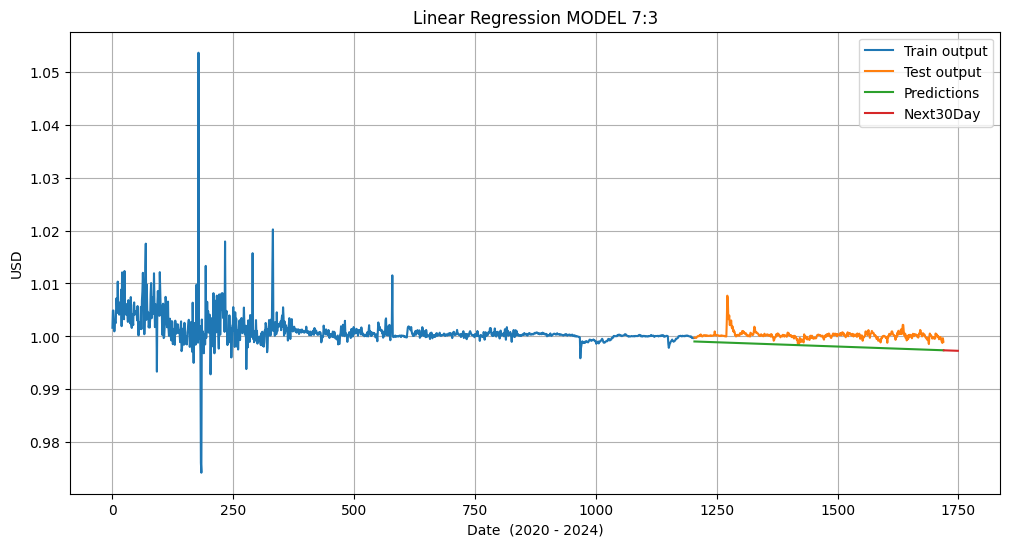

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date  (2020 - 2024)')
plt.ylabel('USD')
plt.show()

In [12]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 0.00
MAPE: 0.20%
MSE: 0.00
RMSE: 0.00


90 days

Predicted closing prices for the next 90 days:
[0.9973719  0.99736868 0.99736546 0.99736223 0.99735901 0.99735579
 0.99735256 0.99734934 0.99734612 0.99734289 0.99733967 0.99733644
 0.99733322 0.99733    0.99732677 0.99732355 0.99732033 0.9973171
 0.99731388 0.99731066 0.99730743 0.99730421 0.99730099 0.99729776
 0.99729454 0.99729131 0.99728809 0.99728487 0.99728164 0.99727842
 0.9972752  0.99727197 0.99726875 0.99726553 0.9972623  0.99725908
 0.99725585 0.99725263 0.99724941 0.99724618 0.99724296 0.99723974
 0.99723651 0.99723329 0.99723007 0.99722684 0.99722362 0.99722039
 0.99721717 0.99721395 0.99721072 0.9972075  0.99720428 0.99720105
 0.99719783 0.99719461 0.99719138 0.99718816 0.99718493 0.99718171
 0.99717849 0.99717526 0.99717204 0.99716882 0.99716559 0.99716237
 0.99715915 0.99715592 0.9971527  0.99714947 0.99714625 0.99714303
 0.9971398  0.99713658 0.99713336 0.99713013 0.99712691 0.99712369
 0.99712046 0.99711724 0.99711401 0.99711079 0.99710757 0.99710434
 0.99710112 0.99

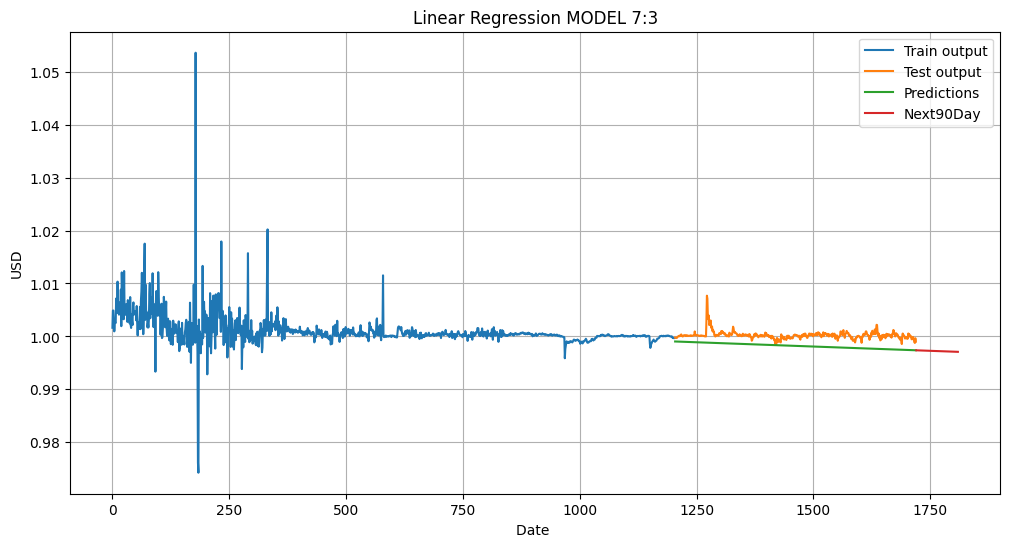

In [13]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

based models comparasion 6:4


Predicted closing prices for the next 30 days:
[0.99640804 0.99640411 0.99640017 0.99639623 0.9963923  0.99638836
 0.99638442 0.99638049 0.99637655 0.99637261 0.99636868 0.99636474
 0.9963608  0.99635687 0.99635293 0.99634899 0.99634506 0.99634112
 0.99633719 0.99633325 0.99632931 0.99632538 0.99632144 0.9963175
 0.99631357 0.99630963 0.99630569 0.99630176 0.99629782 0.99629388]
Validation RMSE: 0.0028800216067284
Testing RMSE: 0.0025945559732438615
Validation RMSE: 0.0028800216067284
Testing RMSE: 0.0025945559732438615


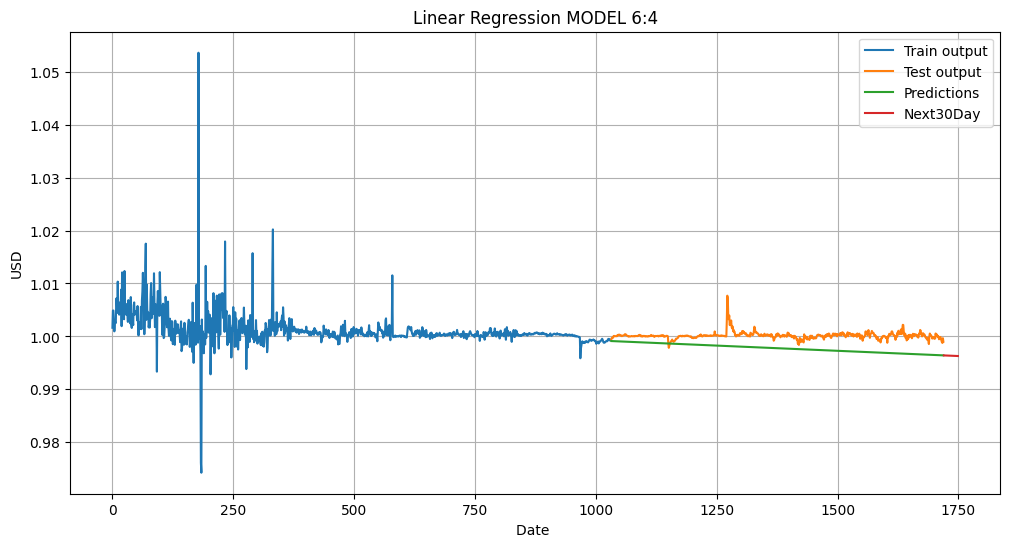

In [14]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [15]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 0.00
MAPE: 0.24%
MSE: 0.00
RMSE: 0.00


Predicted closing prices for the next 90 days:
[0.99640804 0.99640411 0.99640017 0.99639623 0.9963923  0.99638836
 0.99638442 0.99638049 0.99637655 0.99637261 0.99636868 0.99636474
 0.9963608  0.99635687 0.99635293 0.99634899 0.99634506 0.99634112
 0.99633719 0.99633325 0.99632931 0.99632538 0.99632144 0.9963175
 0.99631357 0.99630963 0.99630569 0.99630176 0.99629782 0.99629388
 0.99628995 0.99628601 0.99628207 0.99627814 0.9962742  0.99627027
 0.99626633 0.99626239 0.99625846 0.99625452 0.99625058 0.99624665
 0.99624271 0.99623877 0.99623484 0.9962309  0.99622696 0.99622303
 0.99621909 0.99621516 0.99621122 0.99620728 0.99620335 0.99619941
 0.99619547 0.99619154 0.9961876  0.99618366 0.99617973 0.99617579
 0.99617185 0.99616792 0.99616398 0.99616004 0.99615611 0.99615217
 0.99614824 0.9961443  0.99614036 0.99613643 0.99613249 0.99612855
 0.99612462 0.99612068 0.99611674 0.99611281 0.99610887 0.99610493
 0.996101   0.99609706 0.99609312 0.99608919 0.99608525 0.99608132
 0.99607738 0.99

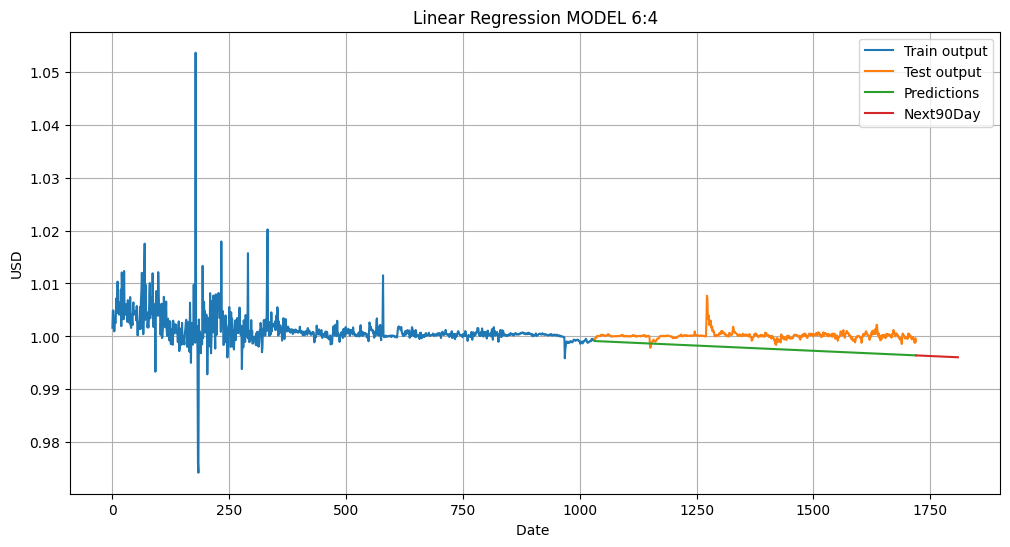

In [16]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

model: 8:2

Predicted closing prices for the next 30 days:
[0.99844385 0.99844146 0.99843906 0.99843667 0.99843427 0.99843188
 0.99842948 0.99842709 0.99842469 0.9984223  0.9984199  0.99841751
 0.99841511 0.99841272 0.99841032 0.99840793 0.99840553 0.99840314
 0.99840074 0.99839835 0.99839595 0.99839356 0.99839116 0.99838877
 0.99838637 0.99838398 0.99838158 0.99837919 0.99837679 0.9983744 ]
Validation RMSE: 0.0008457518379877405
Testing RMSE: 0.0013441146084927622
Validation RMSE: 0.0008457518379877405
Testing RMSE: 0.0013441146084927622


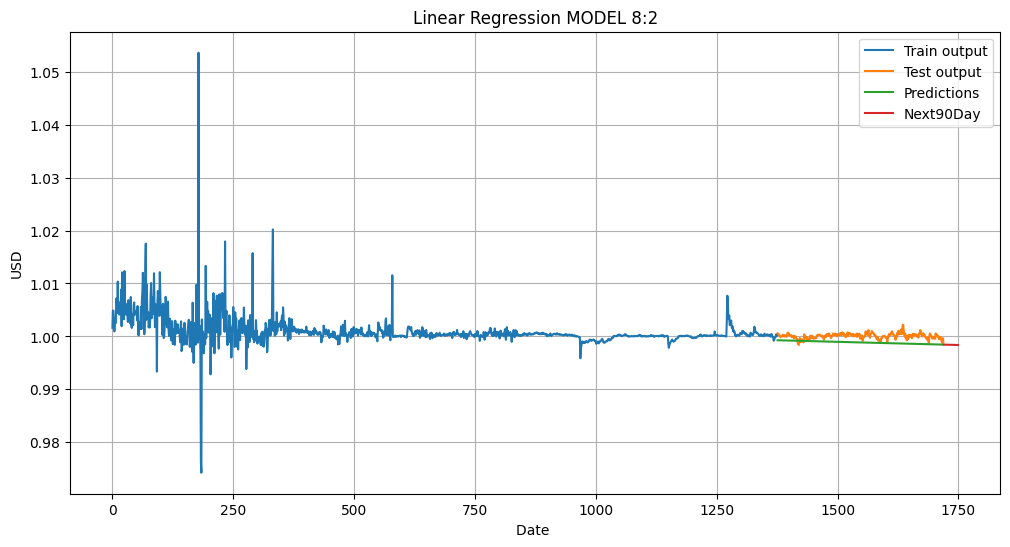

In [17]:
#2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

Predicted closing prices for the next 90 days:
[0.99844385 0.99844146 0.99843906 0.99843667 0.99843427 0.99843188
 0.99842948 0.99842709 0.99842469 0.9984223  0.9984199  0.99841751
 0.99841511 0.99841272 0.99841032 0.99840793 0.99840553 0.99840314
 0.99840074 0.99839835 0.99839595 0.99839356 0.99839116 0.99838877
 0.99838637 0.99838398 0.99838158 0.99837919 0.99837679 0.9983744
 0.998372   0.99836961 0.99836721 0.99836482 0.99836242 0.99836003
 0.99835763 0.99835524 0.99835284 0.99835045 0.99834805 0.99834566
 0.99834326 0.99834087 0.99833847 0.99833608 0.99833368 0.99833129
 0.99832889 0.9983265  0.9983241  0.99832171 0.99831931 0.99831692
 0.99831452 0.99831213 0.99830973 0.99830734 0.99830494 0.99830255
 0.99830015 0.99829776 0.99829536 0.99829297 0.99829057 0.99828818
 0.99828578 0.99828339 0.99828099 0.9982786  0.9982762  0.99827381
 0.99827141 0.99826902 0.99826662 0.99826423 0.99826183 0.99825944
 0.99825704 0.99825465 0.99825225 0.99824986 0.99824746 0.99824507
 0.99824267 0.99

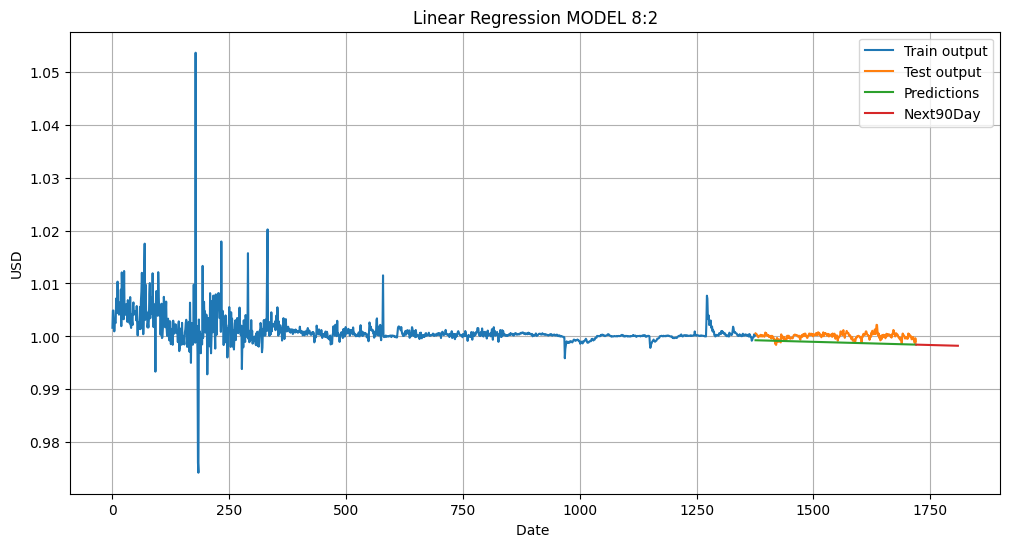

In [18]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [19]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 0.00
MAPE: 0.12%
MSE: 0.00
RMSE: 0.00
